In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
from numpy import math
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz


In [9]:
#memasukkan data
df = pd.read_excel ('D:\MyProject\RekomendasiBeasiswa\Data\BeasiswaBI.xlsx')

#Menghapus baris pertama 
df=df.drop([0])

#mengganti nama record
df=df.rename(columns={
    'NR':'NR1',
    'Unnamed: 2':'NR2',
    'Unnamed: 3':'NR3',
    'Unnamed: 4':'NR4',
    'Unnamed: 5':'NR5',
    'Unnamed: 6':'NR6',
    'Unnamed: 7':'NR7',
    'Unnamed: 8':'NR8',
    'Unnamed: 9':'NR9',
    'Unnamed: 10':'NR10',
    'Unnamed: 11':'NR11'
},inplace=False)
header=list(df)

#Menggeser value column
for i in df.index:
    j=1
    while math.isnan(float(df.loc[i, header[j]])):
        temp=df.loc[i, header[j]]
        for k in range(0,11):
            a=j+k
            b=a+1
            df.loc[i, header[a]]=df.loc[i, header[b]]
        df.loc[i, header[11]]=temp
df=df.reset_index(drop=True)

#menghapus column
# df.info()
for i in range(8,12):
    if df[header[i]].isnull().sum():
        del df[header[i]]
        
#Mengisi data yang kosong
x=df.loc[:,header[0]]
del df['Status Beasiswa BI']
df = df.apply(pd.to_numeric)
df['Decision']=x
# del df['NR1']
# del df['NR2']
# del df['NR3']
# del df['NR4']
# del df['NR5']
del df['NR6']
del df['NR7']
df=df.reset_index(drop=True)
df

## Splitting Data 80 train, 20 test
df_train, df_test=np.split(df.sample(frac=1,random_state=42),[int(0.8*len(df))])
outcome_train = df_train.Decision.tolist()
outcome_test = df_test.Decision.tolist()

train_data_remove = df_train.drop(columns = "Decision")
test_data_remove = df_test.drop(columns = "Decision")


In [10]:
clf = sklearn.tree.DecisionTreeClassifier()

clf = clf.fit(train_data_remove, outcome_train)

dot_data=tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.format = 'png'
graph.render('dtree_render',view=True)
# graph = graphviz.Source(dot_data)
# graph.render()

# graph


'dtree_render.png'

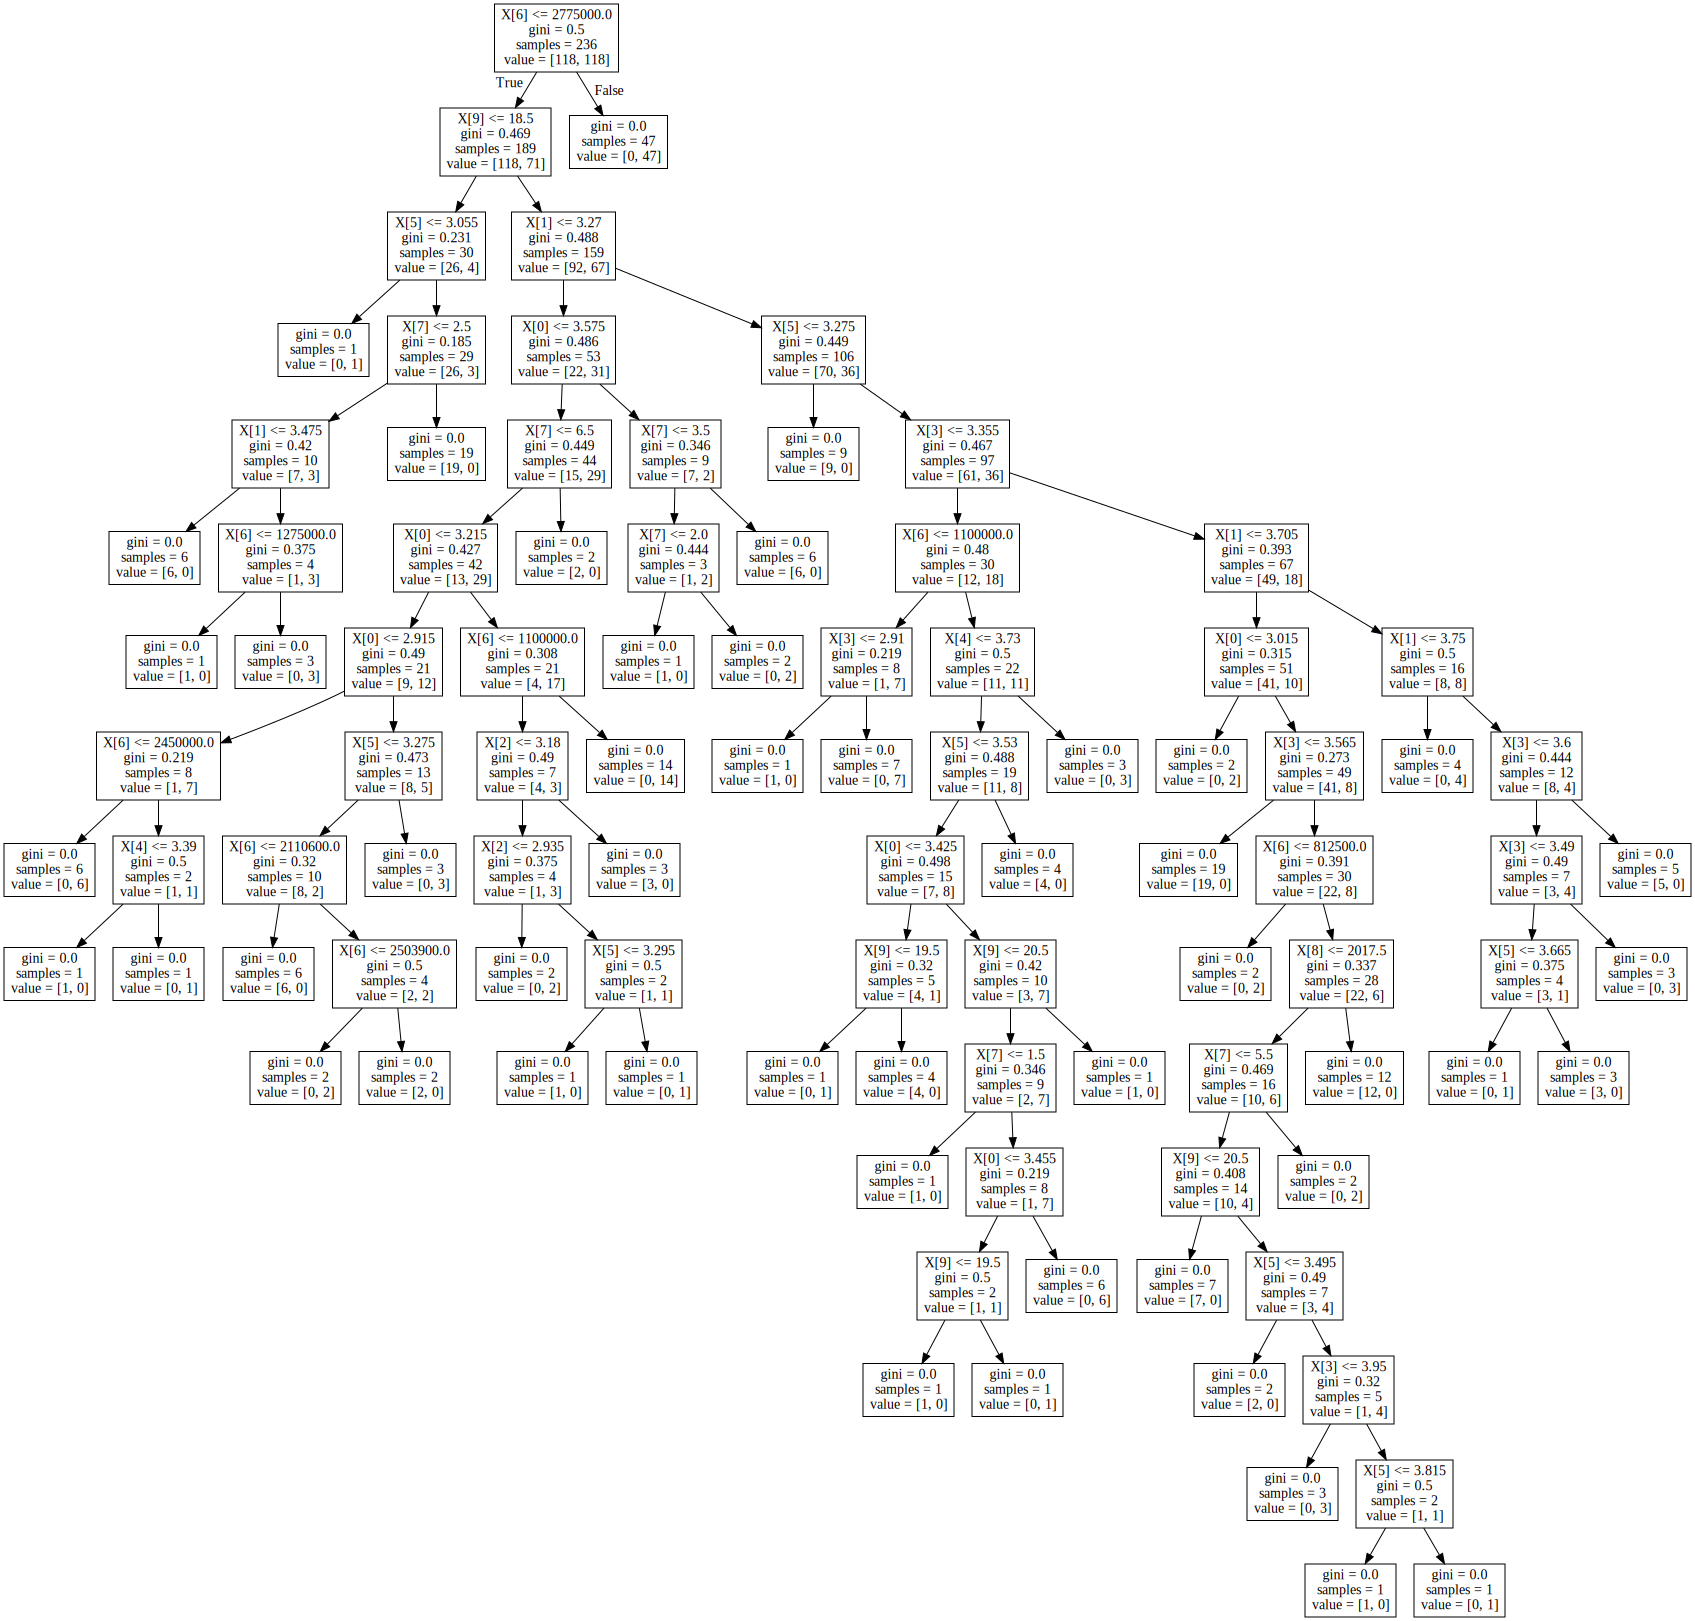

In [11]:
graph

In [12]:
test_array2 = clf.predict(test_data_remove).tolist()
CTestAccuracy = sklearn.metrics.accuracy_score(outcome_test, test_array2)
print(test_array2)
print('C4.5 Testing accuracy: ',CTestAccuracy)

['Iya', 'Iya', 'Iya', 'Iya', 'Iya', 'Iya', 'Tidak', 'Iya', 'Iya', 'Iya', 'Tidak', 'Iya', 'Tidak', 'Iya', 'Iya', 'Iya', 'Tidak', 'Iya', 'Iya', 'Iya', 'Tidak', 'Iya', 'Iya', 'Iya', 'Iya', 'Tidak', 'Iya', 'Iya', 'Tidak', 'Iya', 'Iya', 'Iya', 'Tidak', 'Iya', 'Tidak', 'Tidak', 'Iya', 'Tidak', 'Tidak', 'Tidak', 'Iya', 'Iya', 'Iya', 'Iya', 'Tidak', 'Tidak', 'Tidak', 'Iya', 'Iya', 'Tidak', 'Tidak', 'Iya', 'Iya', 'Iya', 'Iya', 'Tidak', 'Iya', 'Iya', 'Tidak', 'Iya']
C4.5 Testing accuracy:  0.6333333333333333


In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(outcome_test, test_array2)

0.6333333333333333

In [20]:
TP=0
TN=0
FP=0
FN=0
for i in range(len(outcome_test)):
    if outcome_test[i] != test_array2[i]:
        if (outcome_test[i] == "Iya") and (test_array2[i] !="Iya"):
            FN+=1
        else:
            FP+=1
    else:
        if (outcome_test[i] == "Iya") and (test_array2[i] =="Iya"):
            TP+=1
        else:
            TN+=1
    print(i," ",outcome_test[i],test_array2[i],"| TP=",TP,", TN=",TN,", FP=",FP, ", FN=",FN)

0   Tidak Iya | TP= 0 , TN= 0 , FP= 1 , FN= 0
1   Tidak Iya | TP= 0 , TN= 0 , FP= 2 , FN= 0
2   Iya Iya | TP= 1 , TN= 0 , FP= 2 , FN= 0
3   Iya Iya | TP= 2 , TN= 0 , FP= 2 , FN= 0
4   Iya Iya | TP= 3 , TN= 0 , FP= 2 , FN= 0
5   Iya Iya | TP= 4 , TN= 0 , FP= 2 , FN= 0
6   Iya Tidak | TP= 4 , TN= 0 , FP= 2 , FN= 1
7   Iya Iya | TP= 5 , TN= 0 , FP= 2 , FN= 1
8   Iya Iya | TP= 6 , TN= 0 , FP= 2 , FN= 1
9   Iya Iya | TP= 7 , TN= 0 , FP= 2 , FN= 1
10   Tidak Tidak | TP= 7 , TN= 1 , FP= 2 , FN= 1
11   Iya Iya | TP= 8 , TN= 1 , FP= 2 , FN= 1
12   Tidak Tidak | TP= 8 , TN= 2 , FP= 2 , FN= 1
13   Iya Iya | TP= 9 , TN= 2 , FP= 2 , FN= 1
14   Tidak Iya | TP= 9 , TN= 2 , FP= 3 , FN= 1
15   Iya Iya | TP= 10 , TN= 2 , FP= 3 , FN= 1
16   Tidak Tidak | TP= 10 , TN= 3 , FP= 3 , FN= 1
17   Tidak Iya | TP= 10 , TN= 3 , FP= 4 , FN= 1
18   Tidak Iya | TP= 10 , TN= 3 , FP= 5 , FN= 1
19   Iya Iya | TP= 11 , TN= 3 , FP= 5 , FN= 1
20   Iya Tidak | TP= 11 , TN= 3 , FP= 5 , FN= 2
21   Iya Iya | TP= 12 , TN= 3 , F

In [21]:
print(TP,TN,df_test.shape[0])
CTestAccuracy=(TP+TN)/df_test.shape[0]
print('C4.5 Testing accuracy: ',CTestAccuracy)
# df=df.reset_index(drop=True)
# print(df.iloc[295:,:12].values[0])

24 14 60
C4.5 Testing accuracy:  0.6333333333333333
